In [1]:
# Подключение пакетов:
import Pkg
Pkg.add("JuMP")
Pkg.add("GLPK")
using JuMP
using GLPK

    Updating registry at `C:\Users\GlebB\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\GlebB\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\GlebB\.julia\environments\v1.9\Manifest.toml`
Precompiling project...
  ✓ SimpleTraits
  ✓ WeakRefStrings
  ✓ OpenSSL
  ✓ BenchmarkTools
  ✓ CategoricalArrays → CategoricalArraysJSONExt
  ✓ ForwardDiff → ForwardDiffStaticArraysExt
  ✓ LoopVectorization → ForwardDiffExt
  ✓ TimeZones
  ✓ ImageAxes
  ✓ Graphs
  ✓ HTTP
  ✓ JLD2
  ✓ LabelledArrays
  ✓ DiffEqNoiseProcess
  ✓ TimeZones → TimeZonesRecipesBaseExt
  ✓ CSV
  ✓ VertexSafeGraphs
  ✓ ImageMetadata
  ✓ SimpleWeightedGraphs
  ✓ JumpProcesses
  ✓ Plots → FileIOExt
  ✓ MetaGraphs
  ✓ RData
  ✓ SparseDiffTools
  ✓ Netpbm
  ✓ JumpProcesses → JumpProcessFastBroadcastExt
  ✓ Plots → IJuliaExt
  ✓ ImageSegmentation
  ✓ SymbolicUtils
  ✓ RDatasets
  ✓ Images
  ✓ Symbolics
  ✓ SparseDiffTools → SparseDiffToolsSymbolicsExt
  ✓ MathOptInterface


In [2]:
# Определение объекта модели с именем model:
model = Model(GLPK.Optimizer)

A JuMP Model
Feasibility problem with:
Variables: 0
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: GLPK

In [3]:
# Определение переменных x, y и граничных условий для них:
@variable(model, x >= 0)
@variable(model, y >= 0)

y

In [4]:
# Определение ограничений модели:
@constraint(model, 6x + 8y >= 100)
@constraint(model, 7x + 12y >= 120)

7 x + 12 y >= 120

In [5]:
# Определение целевой функции:
@objective(model, Min, 12x + 20y)

12 x + 20 y

In [6]:
# Вызов функции оптимизации:
optimize!(model)

In [7]:
# Определение причины завершения работы оптимизатора:
termination_status(model)

OPTIMAL::TerminationStatusCode = 1

In [8]:
# Демонстрация первичных результирующих значений переменных x и y:
@show value(x);
@show value(y);
# Демонстрация результата оптимизации:
@show objective_value(model);

value(x) = 14.999999999999993
value(y) = 1.2500000000000047
objective_value(model) = 205.0


In [9]:
# Определение объекта модели с именем vector_model:
vector_model = Model(GLPK.Optimizer)

A JuMP Model
Feasibility problem with:
Variables: 0
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: GLPK

In [10]:
# Определение начальных данных:
A= [ 1 1 9 5;
3 5 0 8;
2 0 6 13]
b = [7; 3; 5]
c = [1; 3; 5; 2]

4-element Vector{Int64}:
 1
 3
 5
 2

In [11]:
# Определение вектора переменных:
@variable(vector_model, x[1:4] >= 0)

4-element Vector{VariableRef}:
 x[1]
 x[2]
 x[3]
 x[4]

In [12]:
# Определение ограничений модели:
@constraint(vector_model, A * x .== b)

3-element Vector{ConstraintRef{Model, MathOptInterface.ConstraintIndex{MathOptInterface.ScalarAffineFunction{Float64}, MathOptInterface.EqualTo{Float64}}, ScalarShape}}:
 x[1] + x[2] + 9 x[3] + 5 x[4] == 7
 3 x[1] + 5 x[2] + 8 x[4] == 3
 2 x[1] + 6 x[3] + 13 x[4] == 5

In [13]:
# Определение целевой функции:
@objective(vector_model, Min, c' * x)

x[1] + 3 x[2] + 5 x[3] + 2 x[4]

In [14]:
# Вызов функции оптимизации:
optimize!(vector_model)

In [15]:
# Определение причины завершения работы оптимизатора:
termination_status(vector_model)

OPTIMAL::TerminationStatusCode = 1

In [16]:
# Демонстрация результата оптимизации:
@show objective_value(vector_model);

objective_value(vector_model) = 4.9230769230769225


In [17]:
# Контейнер для хранения данных об ограничениях на количество потребляемых калорий, белков, жиров и соли:
category_data = JuMP.Containers.DenseAxisArray(
[1800 2200;
91 Inf;
0 65;
0 1779],
["calories", "protein", "fat", "sodium"],
["min", "max"])

2-dimensional DenseAxisArray{Float64,2,...} with index sets:
    Dimension 1, ["calories", "protein", "fat", "sodium"]
    Dimension 2, ["min", "max"]
And data, a 4×2 Matrix{Float64}:
 1800.0  2200.0
   91.0    Inf
    0.0    65.0
    0.0  1779.0

In [18]:
# массив данных с наименованиями продуктов:
foods = ["hamburger", "chicken", "hot dog", "fries", "macaroni", "pizza","salad", "milk", "ice cream"]

9-element Vector{String}:
 "hamburger"
 "chicken"
 "hot dog"
 "fries"
 "macaroni"
 "pizza"
 "salad"
 "milk"
 "ice cream"

In [19]:
# Массив стоимости продуктов:
cost = JuMP.Containers.DenseAxisArray(
[2.49, 2.89, 1.50, 1.89, 2.09, 1.99, 2.49, 0.89, 1.59],
foods)

1-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, ["hamburger", "chicken", "hot dog", "fries", "macaroni", "pizza", "salad", "milk", "ice cream"]
And data, a 9-element Vector{Float64}:
 2.49
 2.89
 1.5
 1.89
 2.09
 1.99
 2.49
 0.89
 1.59

In [20]:
# Массив данных о содержании калорий, белков, жиров и соли в продуктах питания:
food_data = JuMP.Containers.DenseAxisArray(
[410 24 26 730;
420 32 10 1190;
560 20 32 1800;
380 4 19 270;
320 12 10 930;
320 15 12 820;
320 31 12 1230;
100 8 2.5 125;
330 8 10 180],
foods,
["calories", "protein", "fat", "sodium"])

2-dimensional DenseAxisArray{Float64,2,...} with index sets:
    Dimension 1, ["hamburger", "chicken", "hot dog", "fries", "macaroni", "pizza", "salad", "milk", "ice cream"]
    Dimension 2, ["calories", "protein", "fat", "sodium"]
And data, a 9×4 Matrix{Float64}:
 410.0  24.0  26.0   730.0
 420.0  32.0  10.0  1190.0
 560.0  20.0  32.0  1800.0
 380.0   4.0  19.0   270.0
 320.0  12.0  10.0   930.0
 320.0  15.0  12.0   820.0
 320.0  31.0  12.0  1230.0
 100.0   8.0   2.5   125.0
 330.0   8.0  10.0   180.0

In [21]:
# Определение объекта модели с именем model:
model = Model(GLPK.Optimizer)

A JuMP Model
Feasibility problem with:
Variables: 0
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: GLPK

In [22]:
# Определим массив:
categories = ["calories", "protein", "fat", "sodium"]

4-element Vector{String}:
 "calories"
 "protein"
 "fat"
 "sodium"

In [23]:
# Определение переменных:
@variables(model, begin
    category_data[c, "min"] <= nutrition[c = categories] <= category_data[c, "max"]
    # Сколько покупать продуктов:
    buy[foods] >= 0
end)

(1-dimensional DenseAxisArray{VariableRef,1,...} with index sets:
    Dimension 1, ["calories", "protein", "fat", "sodium"]
And data, a 4-element Vector{VariableRef}:
 nutrition[calories]
 nutrition[protein]
 nutrition[fat]
 nutrition[sodium], 1-dimensional DenseAxisArray{VariableRef,1,...} with index sets:
    Dimension 1, ["hamburger", "chicken", "hot dog", "fries", "macaroni", "pizza", "salad", "milk", "ice cream"]
And data, a 9-element Vector{VariableRef}:
 buy[hamburger]
 buy[chicken]
 buy[hot dog]
 buy[fries]
 buy[macaroni]
 buy[pizza]
 buy[salad]
 buy[milk]
 buy[ice cream])

In [24]:
# Определение целевой функции:
@objective(model, Min, sum(cost[f] * buy[f] for f in foods))

2.49 buy[hamburger] + 2.89 buy[chicken] + 1.5 buy[hot dog] + 1.89 buy[fries] + 2.09 buy[macaroni] + 1.99 buy[pizza] + 2.49 buy[salad] + 0.89 buy[milk] + 1.59 buy[ice cream]

In [25]:
# Определение ограничений модели:
@constraint(model, [c in categories], sum(food_data[f, c] * buy[f] for f in foods) == nutrition[c])

1-dimensional DenseAxisArray{ConstraintRef{Model, MathOptInterface.ConstraintIndex{MathOptInterface.ScalarAffineFunction{Float64}, MathOptInterface.EqualTo{Float64}}, ScalarShape},1,...} with index sets:
    Dimension 1, ["calories", "protein", "fat", "sodium"]
And data, a 4-element Vector{ConstraintRef{Model, MathOptInterface.ConstraintIndex{MathOptInterface.ScalarAffineFunction{Float64}, MathOptInterface.EqualTo{Float64}}, ScalarShape}}:
 -nutrition[calories] + 410 buy[hamburger] + 420 buy[chicken] + 560 buy[hot dog] + 380 buy[fries] + 320 buy[macaroni] + 320 buy[pizza] + 320 buy[salad] + 100 buy[milk] + 330 buy[ice cream] == 0
 -nutrition[protein] + 24 buy[hamburger] + 32 buy[chicken] + 20 buy[hot dog] + 4 buy[fries] + 12 buy[macaroni] + 15 buy[pizza] + 31 buy[salad] + 8 buy[milk] + 8 buy[ice cream] == 0
 -nutrition[fat] + 26 buy[hamburger] + 10 buy[chicken] + 32 buy[hot dog] + 19 buy[fries] + 10 buy[macaroni] + 12 buy[pizza] + 12 buy[salad] + 2.5 buy[milk] + 10 buy[ice cream] == 0


In [26]:
# Вызов функции оптимизации:
JuMP.optimize!(model)
term_status = JuMP.termination_status(model)

OPTIMAL::TerminationStatusCode = 1

In [27]:
hcat(buy.data,JuMP.value.(buy.data))

9×2 Matrix{AffExpr}:
 buy[hamburger]  0.6045138888888888
 buy[chicken]    0
 buy[hot dog]    0
 buy[fries]      0
 buy[macaroni]   0
 buy[pizza]      0
 buy[salad]      0
 buy[milk]       6.9701388888888935
 buy[ice cream]  2.591319444444441

In [28]:
# Подключение пакетов:
import Pkg
Pkg.add("DelimitedFiles")
Pkg.add("CSV")
using DelimitedFiles
using CSV

   Resolving package versions...
  No Changes to `C:\Users\GlebB\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\GlebB\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\GlebB\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\GlebB\.julia\environments\v1.9\Manifest.toml`


In [29]:
# Считывание данных:
passportdata = readdlm(joinpath("passport-index-matrix.csv"),',')

200×200 Matrix{Any}:
 "Passport"                 "Albania"  …    "Afghanistan"
 "Afghanistan"              "e-visa"      -1
 "Albania"                -1                "visa required"
 "Algeria"                  "e-visa"        "visa required"
 "Andorra"                90                "visa required"
 "Angola"                   "e-visa"   …    "visa required"
 "Antigua and Barbuda"    90                "visa required"
 "Argentina"              90                "visa required"
 "Armenia"                90                "visa required"
 "Australia"              90                "visa required"
 "Austria"                90           …    "visa required"
 "Azerbaijan"             90                "visa required"
 "Bahamas"                90                "visa required"
 ⋮                                     ⋱  
 "United Arab Emirates"   90                "visa required"
 "United Kingdom"         90                "visa required"
 "United States"         360           …    "visa req

In [30]:
# Задаём переменные:
cntr = passportdata[2:end,1]
vf = (x -> typeof(x)==Int64 || x == "VF" || x == "VOA" ? 1 : 0).(passportdata[2:end,2:end]);

In [31]:
# Определение объекта модели с именем model:
model = Model(GLPK.Optimizer)

A JuMP Model
Feasibility problem with:
Variables: 0
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: GLPK

In [32]:
# Переменные, ограничения и целевая функция:
@variable(model, pass[1:length(cntr)], Bin)
@constraint(model, [j=1:length(cntr)], sum( vf[i,j]*pass[i] for i in 1:length(cntr)) >= 1)
@objective(model, Min, sum(pass))

pass[1] + pass[2] + pass[3] + pass[4] + pass[5] + pass[6] + pass[7] + pass[8] + pass[9] + pass[10] + pass[11] + pass[12] + pass[13] + pass[14] + pass[15] + pass[16] + pass[17] + pass[18] + pass[19] + pass[20] + pass[21] + pass[22] + pass[23] + pass[24] + pass[25] + pass[26] + pass[27] + pass[28] + pass[29] + pass[30] + [[...139 terms omitted...]] + pass[170] + pass[171] + pass[172] + pass[173] + pass[174] + pass[175] + pass[176] + pass[177] + pass[178] + pass[179] + pass[180] + pass[181] + pass[182] + pass[183] + pass[184] + pass[185] + pass[186] + pass[187] + pass[188] + pass[189] + pass[190] + pass[191] + pass[192] + pass[193] + pass[194] + pass[195] + pass[196] + pass[197] + pass[198] + pass[199]

In [33]:
# Вызов функции оптимизации:
JuMP.optimize!(model)
termination_status(model)

OPTIMAL::TerminationStatusCode = 1

In [34]:
# Просмотр результата:
print(JuMP.objective_value(model)," passports: ",join(cntr[findall(JuMP.value.(pass) .== 1)],", "))

34.0 passports: Afghanistan, Australia, Bahrain, Cameroon, Canada, Comoros, Congo, Denmark, Djibouti, Eritrea, Guinea-Bissau, Hong Kong, Iran, Kenya, Kuwait, Liberia, Libya, Madagascar, Maldives, Mauritania, Morocco, Nauru, Nepal, New Zealand, North Korea, Palestine, Papua New Guinea, Qatar, Saudi Arabia, Singapore, Somalia, Sri Lanka, Syria, Turkmenistan

In [35]:
# Подключение необходимых пакетов:
import Pkg
Pkg.add("DataFrames")
Pkg.add("XLSX")
Pkg.add("Plots")
Pkg.add("PyPlot")
Pkg.add("Convex")
Pkg.add("SCS")
Pkg.add("Statistics")
using DataFrames
using XLSX
using Plots
pyplot()
using Convex
using SCS
using Statistics

   Resolving package versions...
  No Changes to `C:\Users\GlebB\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\GlebB\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\GlebB\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\GlebB\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\GlebB\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\GlebB\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\GlebB\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\GlebB\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\GlebB\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\GlebB\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\GlebB\.julia\environments\v1.9\Project.toml`
  No Changes to 

LoadError: Failed to precompile PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee] to "C:\\Users\\GlebB\\.julia\\compiled\\v1.9\\PyPlot\\jl_A595.tmp".

In [36]:
# Считываем данные и размещаем их во фрейм:
T = DataFrame(XLSX.readtable("stock_prices.xlsx","Sheet2")...)

LoadError: MethodError: no method matching iterate(::XLSX.DataTable)

[0mClosest candidates are:
[0m  iterate([91m::Union{LinRange, StepRangeLen}[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mrange.jl:880[24m[39m
[0m  iterate([91m::Union{LinRange, StepRangeLen}[39m, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mrange.jl:880[24m[39m
[0m  iterate([91m::T[39m) where T<:Union{Base.KeySet{<:Any, <:Dict}, Base.ValueIterator{<:Dict}}
[0m[90m   @[39m [90mBase[39m [90m[4mdict.jl:698[24m[39m
[0m  ...


In [37]:
# Построение графика:
plot(T[!,:MSFT],label="Microsoft")
plot!(T[!,:AAPL],label="Apple")
plot!(T[!,:FB],label="FB")

LoadError: UndefVarError: `T` not defined

In [38]:
# Данные о ценах на акции размещаем в матрице:
prices_matrix = Matrix(T)

LoadError: UndefVarError: `T` not defined

In [39]:
# Вычисление матрицы доходности за период времени:
M1 = prices_matrix[1:end-1,:]
M2 = prices_matrix[2:end,:]
# Матрица доходности:
R = (M2.-M1)./M1

LoadError: UndefVarError: `prices_matrix` not defined

In [40]:
# Матрица рисков:
risk_matrix = cov(R)
# Проверка положительной определённости матрицы рисков:
isposdef(risk_matrix)

LoadError: UndefVarError: `cov` not defined

In [41]:
# Доход от каждой из компаний:
r = mean(R,dims=1)[:]

LoadError: UndefVarError: `mean` not defined

In [42]:
# Вектор инвестиций:
x = Variable(length(r))

LoadError: UndefVarError: `r` not defined

In [43]:
# Объект модели:
problem = minimize(Convex.quadform(x,risk_matrix),[sum(x)==1;r'*x>=0.02;x.>=0])

LoadError: UndefVarError: `Convex` not defined

In [44]:
# Находим решение:
solve!(problem, SCS.Optimizer)

LoadError: UndefVarError: `problem` not defined

In [45]:
sum(x.value)

LoadError: type Array has no field value

In [46]:
r'*x.value

LoadError: UndefVarError: `r` not defined

In [47]:
x.value .* 1000

LoadError: type Array has no field value

In [48]:
# Подключение необходимых пакетов:
import Pkg
Pkg.add("ImageMagick")
Pkg.add("Convex")
Pkg.add("SCS")
using Images
using Convex
using SCS

   Resolving package versions...
  No Changes to `C:\Users\GlebB\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\GlebB\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\GlebB\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\GlebB\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\GlebB\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\GlebB\.julia\environments\v1.9\Manifest.toml`


In [49]:
import Pkg; Pkg.add("Images")

   Resolving package versions...
  No Changes to `C:\Users\GlebB\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\GlebB\.julia\environments\v1.9\Manifest.toml`


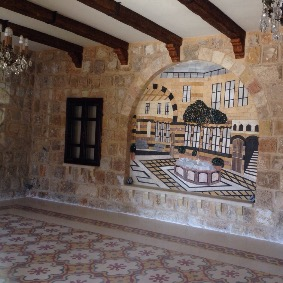

In [50]:
using Images
using Convex
using SCS

# Считывание исходного изображения:
Kref = load("khiam-small.jpg")

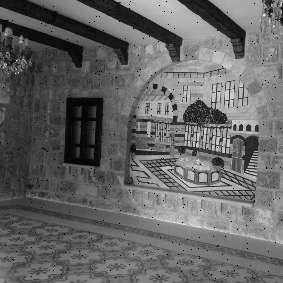

In [51]:
K = copy(Kref)
p = prod(size(K))
missingids = rand(1:p,400)
K[missingids] .= RGBX{N0f8}(0.0,0.0,0.0)
K
Gray.(K)

In [52]:
# Матрица цветов:
Y = Float64.(Gray.(K));

In [53]:
correctids = findall(Y[:].!=0)
X = Convex.Variable(size(Y))
problem = minimize(nuclearnorm(X))
problem.constraints += X[correctids]==Y[correctids]

1-element Vector{Constraint}:
 == constraint (affine)
├─ index (affine; real)
│  └─ 283×283 real variable (id: 716…765)
└─ 79692-element Vector{Float64}

In [54]:
# Находим решение:
solve!(problem, SCS.Optimizer(eps=1e-3, alpha=1.5))

LoadError: MethodError: no method matching SCS.Optimizer(; eps::Float64, alpha::Float64)

[0mClosest candidates are:
[0m  SCS.Optimizer()[91m got unsupported keyword arguments "eps", "alpha"[39m
[0m[90m   @[39m [33mSCS[39m [90mC:\Users\GlebB\.julia\packages\SCS\mqg7w\src\MOI_wrapper\[39m[90m[4mMOI_wrapper.jl:131[24m[39m


In [55]:
@show norm(float.(Gray.(Kref))-X.value)
@show norm(-X.value)
colorview(Gray, X.value)

LoadError: MethodError: no method matching -(::Matrix{Gray{Float32}}, ::Nothing)

[0mClosest candidates are:
[0m  -([91m::VectorizationBase.CartesianVIndex[39m, ::Any)
[0m[90m   @[39m [35mVectorizationBase[39m [90mC:\Users\GlebB\.julia\packages\VectorizationBase\xE5Tx\src\[39m[90m[4mcartesianvindex.jl:80[24m[39m
[0m  -(::Array, [91m::SparseArrays.AbstractSparseMatrixCSC[39m)
[0m[90m   @[39m [33mSparseArrays[39m [90mC:\Users\GlebB\AppData\Local\Programs\Julia-1.9.4\share\julia\stdlib\v1.9\SparseArrays\src\[39m[90m[4msparsematrix.jl:2071[24m[39m
[0m  -([91m::ChainRulesCore.AbstractThunk[39m, ::Any)
[0m[90m   @[39m [36mChainRulesCore[39m [90mC:\Users\GlebB\.julia\packages\ChainRulesCore\zoCjl\src\tangent_types\[39m[90m[4mthunks.jl:34[24m[39m
[0m  ...


In [56]:
#Задание №1
model = Model(GLPK.Optimizer)

A JuMP Model
Feasibility problem with:
Variables: 0
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: GLPK

In [57]:
@variable(model, 0 <= x1 <= 10)
@variable(model, x2 >= 0)
@variable(model, x3 >= 0)

x3

In [58]:
@constraint(model, -x1 + x2 + 3x3 <= -5)
@constraint(model, x1 + 3x2 - 7x3 <= 10)

x1 + 3 x2 - 7 x3 <= 10

In [59]:
@objective(model, Max, x1 + 2x2 + 5x3)

x1 + 2 x2 + 5 x3

In [60]:
optimize!(model)

In [61]:
termination_status(model)

OPTIMAL::TerminationStatusCode = 1

In [62]:
@show value(x1);
@show value(x2);
@show value(x3);

@show objective_value(model);

value(x1) = 10.0
value(x2) = 2.1875
value(x3) = 0.9375
objective_value(model) = 19.0625


In [78]:
#Задание №2
vector_model_2 = Model(GLPK.Optimizer)

A JuMP Model
Feasibility problem with:
Variables: 0
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: GLPK

In [79]:
A= [-1 1 3; 
    1 3 -7]
b = [-5; 10]
c = [1; 2; 5]

3-element Vector{Int64}:
 1
 2
 5

In [80]:
@variable(vector_model_2, x[1:3] >= 0)
set_upper_bound(x[1], 10)

In [81]:
@constraint(vector_model_2, A * x .== b)

2-element Vector{ConstraintRef{Model, MathOptInterface.ConstraintIndex{MathOptInterface.ScalarAffineFunction{Float64}, MathOptInterface.EqualTo{Float64}}, ScalarShape}}:
 -x[1] + x[2] + 3 x[3] == -5
 x[1] + 3 x[2] - 7 x[3] == 10

In [82]:
@objective(vector_model_2, Max, c' * x)

x[1] + 2 x[2] + 5 x[3]

In [83]:
optimize!(vector_model_2)

In [84]:
termination_status(vector_model_2)

OPTIMAL::TerminationStatusCode = 1

In [86]:
@show value(x[1]);
@show value(x[2]);
@show value(x[3]);
@show objective_value(vector_model_2);

value(x[1]) = 10.0
value(x[2]) = 2.1875
value(x[3]) = 0.9375
objective_value(vector_model_2) = 19.0625


In [88]:
#Задание №3
using Convex
using SCS

m = 5
n = 4

A = rand(m, n)
b = rand(m)

display(A)
println()
display(b)

x = Variable(n)

display(x)

model_new = minimize(Convex.sumsquares(A*x - b),[x >= 0])

solve!(model_new, SCS.Optimizer)

model_new.status

model_new.optval

5×4 Matrix{Float64}:
 0.773851   0.731559  0.357961   0.927942
 0.314247   0.176215  0.0499934  0.0422559
 0.466721   0.716408  0.0630813  0.348065
 0.0164345  0.729675  0.735458   0.333719
 0.0464965  0.712228  0.135479   0.900962

5-element Vector{Float64}:
 0.8268418409480427
 0.49514939277052095
 0.6590045164267194
 0.5258444087859125
 0.40987048589545183

Variable
size: (4, 1)
sign: real
vexity: affine
id: 144…234

------------------------------------------------------------------
	       SCS v3.2.4 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 7, constraints m: 15
cones: 	  z: primal zero / dual free vars: 1
	  l: linear vars: 5
	  q: soc vars: 9, qsize: 2
settings: eps_abs: 1.0e-004, eps_rel: 1.0e-004, eps_infeas: 1.0e-007
	  alpha: 1.50, scale: 1.00e-001, adaptive_scale: 1
	  max_iters: 100000, normalize: 1, rho_x: 1.00e-006
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 30, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
------------------------------------------------------------------
     0|1.71e+001 1.00e+000 1.62e+001 -8.04e+000 1.00e-001 4.58e-003 
   125|1.00e-005 5.56e-006 1.04e-005 4.84e-002 5.56e-001 4.71e-003 
------

0.048422158379626865